In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport


In [2]:
df=pd.read_csv('investment.csv')

In [3]:
df.head()

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,Moneyatcallandshortnotice\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,...,Premises,Fixedassetsunderconstruction,OtherFixedassets\n,OtherAssets,Interofficeadjustmentsnet\n,Interestaccrued \n,Taxpaid\n,StationeryandStamps\n,Others\n.1,TotalAssets
0,2021,BANK OF BARODA,4178.20,34662.83,4343.50,17306.20,59922.08,261220.27,248274.54,226796.48,...,6525.65,0.00,1490.59,59414.93,NaN,7251.36,8675.32,8.22,43480.03,1155364.77
1,2021,BANK OF INDIA,3295.51,57402.06,102.10,15554.80,50226.20,187252.85,180476.47,165637.33,...,1150.40,6761.55,1002.18,37422.28,5589.01,2890.48,4879.55,7.76,24055.48,725856.45
2,2021,BANK OF MAHARASHTRA,1006.86,11875.63,41.34,NaN,17.91,68111.64,68111.64,61114.17,...,1302.02,52.01,319.97,11532.47,NaN,1409.18,1740.08,2.45,8380.76,196665.01
3,2021,CANARA BANK,4400.38,38711.24,60.87,82698.16,52537.38,261690.39,258531.80,240809.05,...,9361.66,4.53,1840.34,63321.09,NaN,8449.97,13670.13,3.57,41197.41,1153675.03
4,2021,CENTRAL BANK OF INDIA,1475.16,30712.68,52.12,200.00,6511.35,148582.43,148534.95,110358.42,...,4057.27,0.00,1075.15,19970.18,NaN,2254.86,4237.21,20.56,13457.55,369214.99


In [4]:
profile=ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [5]:
df.shape

(1585, 43)

In [6]:
count_nan = df.isna().sum()
count_nan

Year                                   2
Banks                                  3
CashInHand\n                          79
 BalanceswithRBI\n                     3
BalanceswithbanksInIndia\n             5
Moneyatcallandshortnotice\n          451
BalanceswithbanksoutsideIndia         91
Investments\n                         30
InvestmentsinIndia\n                  30
 Governmentsecurities\n               35
Otherapprovedsecurities\n            978
Shares\n                             540
DebenturesandBonds\n                 454
SubsidiariesandOrjointventures\n     967
 Others\n                            375
InvestmentsoutsideIndia\n           1159
 Governmentsecurities\n.1           1309
SubsidiariesandOrjointVentures\n    1335
Others\n                            1213
Advances\n                            41
Billspurchasedanddiscounted\n        175
Cashcreditsoverdraftsand loans\n      86
Termloans\n                           90
Securedbytangibleassets\n             89
 CoveredbyBankGo

In [7]:
cnt=0
for i in count_nan:
    if(i>300):
        cnt+=1
print(cnt)

18


In [8]:
df2=df.copy()

In [9]:
lis1=[]
for names,values in df.iteritems():
    lis1.append(names)

In [10]:
dicto={}

for i in range(0,len(count_nan)):
    dicto[lis1[i]]=count_nan[i]
    


In [11]:
lis2=[]
for i,j in dicto.items():
    if(j>300):
        lis2.append(i)


In [12]:
df2.drop(lis2,axis=1,inplace=True)

In [13]:
df2.shape

(1585, 25)

In [296]:
# profile=ProfileReport(df2,title='Pandas Profiling Report',explorative=True)
# profile.to_notebook_iframe()

## One hot encoding banks

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
dfle = df2
dfle.Banks = le.fit_transform(dfle.Banks)
dfle

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,...,AdvancesinIndia,Prioritysectors \n,others\n,FixedAssets,OtherFixedassets\n,OtherAssets,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets
0,2021,19,4178.20,34662.83,4343.50,59922.08,261220.27,248274.54,226796.48,706300.51,...,605615.80,219473.30,285011.97,8016.25,1490.59,59414.93,7251.36,8675.32,43480.03,1155364.77
1,2021,22,3295.51,57402.06,102.10,50226.20,187252.85,180476.47,165637.33,365686.52,...,326537.26,121741.28,118835.08,8914.13,1002.18,37422.28,2890.48,4879.55,24055.48,725856.45
2,2021,23,1006.86,11875.63,41.34,17.91,68111.64,68111.64,61114.17,102405.17,...,102405.17,45549.81,41590.87,1674.00,319.97,11532.47,1409.18,1740.08,8380.76,196665.01
3,2021,31,4400.38,38711.24,60.87,52537.38,261690.39,258531.80,240809.05,639048.99,...,619555.88,300354.16,268920.64,11206.53,1840.34,63321.09,8449.97,13670.13,41197.41,1153675.03
4,2021,35,1475.16,30712.68,52.12,6511.35,148582.43,148534.95,110358.42,156578.65,...,156578.65,80842.58,70636.82,5132.42,1075.15,19970.18,2254.86,4237.21,13457.55,369214.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,2005,165,0.03,6.69,76.22,3.73,60.22,60.22,40.93,102.28,...,102.28,13.05,89.23,1.85,1.85,6.00,1.20,3.62,1.17,324.00
1581,2005,68,345.94,6413.07,7137.88,1832.94,42857.61,42857.61,34042.99,75318.25,...,75318.25,19411.73,54998.15,1882.73,628.10,15408.08,1326.96,1057.56,12944.96,153636.33
1582,2005,4,9644.85,108430.63,39890.14,18199.35,869737.02,854744.19,695421.74,1150836.26,...,1091413.89,370602.98,599950.08,23050.92,10860.59,98452.73,22501.21,16836.03,56066.71,2355509.27
1583,NaN,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
len(dfle['Banks'].unique())

179

In [18]:
dfle

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,...,AdvancesinIndia,Prioritysectors \n,others\n,FixedAssets,OtherFixedassets\n,OtherAssets,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets
0,2021,19,4178.20,34662.83,4343.50,59922.08,261220.27,248274.54,226796.48,706300.51,...,605615.80,219473.30,285011.97,8016.25,1490.59,59414.93,7251.36,8675.32,43480.03,1155364.77
1,2021,22,3295.51,57402.06,102.10,50226.20,187252.85,180476.47,165637.33,365686.52,...,326537.26,121741.28,118835.08,8914.13,1002.18,37422.28,2890.48,4879.55,24055.48,725856.45
2,2021,23,1006.86,11875.63,41.34,17.91,68111.64,68111.64,61114.17,102405.17,...,102405.17,45549.81,41590.87,1674.00,319.97,11532.47,1409.18,1740.08,8380.76,196665.01
3,2021,31,4400.38,38711.24,60.87,52537.38,261690.39,258531.80,240809.05,639048.99,...,619555.88,300354.16,268920.64,11206.53,1840.34,63321.09,8449.97,13670.13,41197.41,1153675.03
4,2021,35,1475.16,30712.68,52.12,6511.35,148582.43,148534.95,110358.42,156578.65,...,156578.65,80842.58,70636.82,5132.42,1075.15,19970.18,2254.86,4237.21,13457.55,369214.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,2005,165,0.03,6.69,76.22,3.73,60.22,60.22,40.93,102.28,...,102.28,13.05,89.23,1.85,1.85,6.00,1.20,3.62,1.17,324.00
1581,2005,68,345.94,6413.07,7137.88,1832.94,42857.61,42857.61,34042.99,75318.25,...,75318.25,19411.73,54998.15,1882.73,628.10,15408.08,1326.96,1057.56,12944.96,153636.33
1582,2005,4,9644.85,108430.63,39890.14,18199.35,869737.02,854744.19,695421.74,1150836.26,...,1091413.89,370602.98,599950.08,23050.92,10860.59,98452.73,22501.21,16836.03,56066.71,2355509.27
1583,NaN,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8-4-22-not knowing what the columns are so treating them as random values

## outlier removal

In [19]:
df3=dfle.copy()

In [20]:
df3['Investments\n']

0       261220.27
1       187252.85
2        68111.64
3       261690.39
4       148582.43
          ...    
1580        60.22
1581     42857.61
1582    869737.02
1583          NaN
1584          NaN
Name: Investments\n, Length: 1585, dtype: float64

In [ ]:
# profile=ProfileReport(dfle,title='Pandas Profiling Report',explorative=True)
# profile.to_notebook_iframe()

In [ ]:
#Investment and advance as the output variable
#estimate the efficiecny of the bank rdea package
#technical scale efficieny and productivity


In [ ]:
dfle

In [21]:
len(dfle[dfle['CashInHand\n']==0])

47

# dimensionality reduction

In [22]:
df5=dfle.copy()

In [23]:
# df5.Banks = df5.Banks.apply(lambda x: x.strip())
location_stats = df5['Banks'].value_counts(ascending=False)
location_stats

89     17
22     17
24     17
161    17
27     17
       ..
21      2
165     1
87      1
25      1
65      1
Name: Banks, Length: 179, dtype: int64

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=5]
len(location_stats_less_than_10)

48

In [25]:
len(location_stats)

179

In [26]:
len(df5['Banks'].unique())

179

In [27]:
df6=df5.copy()

In [28]:
df6.Banks = df6.Banks.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.Banks.unique())

132

# Outlier removal

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Banks'):
        m = np.mean(subdf['Investments\n'])
        st = np.std(subdf['Investments\n'])
        reduced_df = subdf[(subdf['Investments\n']>(m-st)) & (subdf['Investments\n']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(1012, 25)

In [42]:
#573 columns have been removed as outliers
df6.shape[0]-df7.shape[0]

573

In [49]:
df7['FixedAssets'].describe()

count      1012.00000
mean       1980.08666
std        8439.07275
min           0.06000
25%          15.04500
50%         157.86000
75%        1252.24250
max      150685.40000
Name: FixedAssets, dtype: float64

# feature engineering

### combining FixedAssets	OtherFixedassets\n	OtherAssets

In [50]:
df7.head()

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,...,AdvancesinIndia,Prioritysectors \n,others\n,FixedAssets,OtherFixedassets\n,OtherAssets,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets
0,2021,0,0.30,4.72,51.00,130.12,40.42,40.42,40.42,61.29,...,61.29,58.37,2.91,0.55,0.55,10.84,1.43,0.63,8.77,299.23
1,2020,0,0.31,2.44,31.55,48.55,39.58,39.58,39.58,55.02,...,55.02,52.13,2.90,0.66,0.66,10.29,2.05,0.88,7.34,203.41
2,2019,0,0.33,2.23,22.06,111.60,31.44,31.44,31.44,50.96,...,50.96,24.41,26.55,1.01,1.01,26.11,1.32,0.58,24.19,250.24
3,2018,0,0.33,2.68,24.83,68.59,33.26,33.26,33.26,50.59,...,50.59,18.85,31.74,0.80,0.80,22.14,1.26,1.79,19.07,212.70
4,2012,1,0.27,1.68,2.52,13.45,16.22,16.22,13.12,67.02,...,67.02,27.08,39.94,1.79,1.79,11.55,0.85,0.22,10.47,114.50


In [53]:
df8=df7.copy()

In [54]:
df8['NewAssets']=df7['FixedAssets']+df7['OtherFixedassets\n']+df7['OtherAssets']

In [55]:
lis=['FixedAssets' ,'OtherFixedassets\n','OtherAssets']
df8.drop(lis,axis=1,inplace=True)

In [56]:
df8.head()

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,...,Securedbytangibleassets\n,Unsecured\n,AdvancesinIndia,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets
0,2021,0,0.30,4.72,51.00,130.12,40.42,40.42,40.42,61.29,...,2.91,4.22,61.29,58.37,2.91,1.43,0.63,8.77,299.23,11.94
1,2020,0,0.31,2.44,31.55,48.55,39.58,39.58,39.58,55.02,...,2.90,12.14,55.02,52.13,2.90,2.05,0.88,7.34,203.41,11.61
2,2019,0,0.33,2.23,22.06,111.60,31.44,31.44,31.44,50.96,...,1.96,19.18,50.96,24.41,26.55,1.32,0.58,24.19,250.24,28.13
3,2018,0,0.33,2.68,24.83,68.59,33.26,33.26,33.26,50.59,...,4.36,9.54,50.59,18.85,31.74,1.26,1.79,19.07,212.70,23.74
4,2012,1,0.27,1.68,2.52,13.45,16.22,16.22,13.12,67.02,...,8.93,58.10,67.02,27.08,39.94,0.85,0.22,10.47,114.50,15.13


In [63]:
df9=df8.copy()

In [76]:
df9['Balances']=df8[' BalanceswithRBI\n']+df8['BalanceswithbanksInIndia\n']+df8['BalanceswithbanksoutsideIndia']

In [77]:
df9.head()

,Year,Banks,CashInHand\n,BalanceswithRBI\n,BalanceswithbanksInIndia\n,BalanceswithbanksoutsideIndia,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,...,Unsecured\n,AdvancesinIndia,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets,Balances
0,2021,0,0.30,4.72,51.00,130.12,40.42,40.42,40.42,61.29,...,4.22,61.29,58.37,2.91,1.43,0.63,8.77,299.23,11.94,185.84
1,2020,0,0.31,2.44,31.55,48.55,39.58,39.58,39.58,55.02,...,12.14,55.02,52.13,2.90,2.05,0.88,7.34,203.41,11.61,82.54
2,2019,0,0.33,2.23,22.06,111.60,31.44,31.44,31.44,50.96,...,19.18,50.96,24.41,26.55,1.32,0.58,24.19,250.24,28.13,135.89
3,2018,0,0.33,2.68,24.83,68.59,33.26,33.26,33.26,50.59,...,9.54,50.59,18.85,31.74,1.26,1.79,19.07,212.70,23.74,96.10
4,2012,1,0.27,1.68,2.52,13.45,16.22,16.22,13.12,67.02,...,58.10,67.02,27.08,39.94,0.85,0.22,10.47,114.50,15.13,17.65


In [78]:
lis=['BalanceswithbanksInIndia\n',' BalanceswithRBI\n','BalanceswithbanksoutsideIndia']
df9.drop(lis,axis=1,inplace=True)

In [79]:
df9.head()

,Year,Banks,CashInHand\n,Investments\n,InvestmentsinIndia\n,Governmentsecurities\n,Advances\n,Billspurchasedanddiscounted\n,Cashcreditsoverdraftsand loans\n,Termloans\n,...,Unsecured\n,AdvancesinIndia,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets,Balances
0,2021,0,0.30,40.42,40.42,40.42,61.29,58.37,2.86,0.05,...,4.22,61.29,58.37,2.91,1.43,0.63,8.77,299.23,11.94,185.84
1,2020,0,0.31,39.58,39.58,39.58,55.02,52.13,2.84,0.05,...,12.14,55.02,52.13,2.90,2.05,0.88,7.34,203.41,11.61,82.54
2,2019,0,0.33,31.44,31.44,31.44,50.96,49.00,1.89,0.07,...,19.18,50.96,24.41,26.55,1.32,0.58,24.19,250.24,28.13,135.89
3,2018,0,0.33,33.26,33.26,33.26,50.59,44.34,3.97,2.28,...,9.54,50.59,18.85,31.74,1.26,1.79,19.07,212.70,23.74,96.10
4,2012,1,0.27,16.22,16.22,13.12,67.02,46.55,2.72,17.75,...,58.10,67.02,27.08,39.94,0.85,0.22,10.47,114.50,15.13,17.65


## investements and investements in india are the same so remove one of them

In [83]:
df9.drop('InvestmentsinIndia\n',axis=1,inplace=True)

In [90]:
df9.head()

,Year,Banks,CashInHand\n,Investments\n,Governmentsecurities\n,Advances\n,Billspurchasedanddiscounted\n,Cashcreditsoverdraftsand loans\n,Termloans\n,Securedbytangibleassets\n,Unsecured\n,AdvancesinIndia,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets,Balances
0,2021,0,0.30,40.42,40.42,61.29,58.37,2.86,0.05,2.91,4.22,61.29,58.37,2.91,1.43,0.63,8.77,299.23,11.94,185.84
1,2020,0,0.31,39.58,39.58,55.02,52.13,2.84,0.05,2.90,12.14,55.02,52.13,2.90,2.05,0.88,7.34,203.41,11.61,82.54
2,2019,0,0.33,31.44,31.44,50.96,49.00,1.89,0.07,1.96,19.18,50.96,24.41,26.55,1.32,0.58,24.19,250.24,28.13,135.89
3,2018,0,0.33,33.26,33.26,50.59,44.34,3.97,2.28,4.36,9.54,50.59,18.85,31.74,1.26,1.79,19.07,212.70,23.74,96.10
4,2012,1,0.27,16.22,13.12,67.02,46.55,2.72,17.75,8.93,58.10,67.02,27.08,39.94,0.85,0.22,10.47,114.50,15.13,17.65


### advances and advances in india have the same values for all rows so remove one

In [93]:
df9.drop(' AdvancesinIndia',axis=1,inplace=True)

In [94]:
df9.head()

,Year,Banks,CashInHand\n,Investments\n,Governmentsecurities\n,Advances\n,Billspurchasedanddiscounted\n,Cashcreditsoverdraftsand loans\n,Termloans\n,Securedbytangibleassets\n,Unsecured\n,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets,Balances
0,2021,0,0.30,40.42,40.42,61.29,58.37,2.86,0.05,2.91,4.22,58.37,2.91,1.43,0.63,8.77,299.23,11.94,185.84
1,2020,0,0.31,39.58,39.58,55.02,52.13,2.84,0.05,2.90,12.14,52.13,2.90,2.05,0.88,7.34,203.41,11.61,82.54
2,2019,0,0.33,31.44,31.44,50.96,49.00,1.89,0.07,1.96,19.18,24.41,26.55,1.32,0.58,24.19,250.24,28.13,135.89
3,2018,0,0.33,33.26,33.26,50.59,44.34,3.97,2.28,4.36,9.54,18.85,31.74,1.26,1.79,19.07,212.70,23.74,96.10
4,2012,1,0.27,16.22,13.12,67.02,46.55,2.72,17.75,8.93,58.10,27.08,39.94,0.85,0.22,10.47,114.50,15.13,17.65


### combining termloans and unsecured loans

In [104]:
df9['loans']=df9['Termloans\n']+df9['Unsecured\n']

In [105]:
lis=['Termloans\n','Unsecured\n']

In [107]:
df9.drop(lis,axis=1,inplace=True)

## removing outliers from newly made columns

In [111]:
df9.head()

,Year,Banks,CashInHand\n,Investments\n,Governmentsecurities\n,Advances\n,Billspurchasedanddiscounted\n,Cashcreditsoverdraftsand loans\n,Securedbytangibleassets\n,Prioritysectors \n,others\n,Interestaccrued \n,Taxpaid\n,Others\n.1,TotalAssets,NewAssets,Balances,loans
0,2021,0,0.30,40.42,40.42,61.29,58.37,2.86,2.91,58.37,2.91,1.43,0.63,8.77,299.23,11.94,185.84,4.27
1,2020,0,0.31,39.58,39.58,55.02,52.13,2.84,2.90,52.13,2.90,2.05,0.88,7.34,203.41,11.61,82.54,12.19
2,2019,0,0.33,31.44,31.44,50.96,49.00,1.89,1.96,24.41,26.55,1.32,0.58,24.19,250.24,28.13,135.89,19.25
3,2018,0,0.33,33.26,33.26,50.59,44.34,3.97,4.36,18.85,31.74,1.26,1.79,19.07,212.70,23.74,96.10,11.82
4,2012,1,0.27,16.22,13.12,67.02,46.55,2.72,8.93,27.08,39.94,0.85,0.22,10.47,114.50,15.13,17.65,75.85


<AxesSubplot:xlabel='Year', ylabel='NewAssets'>

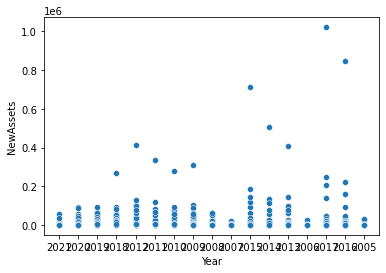

In [116]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(data=df9, x="Year", y="NewAssets")

### removing outliers using standard deviation

In [153]:
min_thresold, max_thresold = df9['NewAssets'].quantile([0.05, 0.95])
min_thresold, max_thresold

(10.235, 59597.884999999995)

In [154]:
df10 = df9[(df9['NewAssets']<max_thresold) & (df9['NewAssets']>min_thresold)]
df10.shape

(909, 18)

In [155]:
abs(df10.shape[0]-df9.shape[0])

103

### for balances 

In [156]:
min_thresold, max_thresold = df10['Balances'].quantile([0.05, 0.95])
min_thresold, max_thresold

(43.480000000000004, 34161.90199999997)

In [157]:
df11 = df10[(df10['NewAssets']<max_thresold) & (df10['NewAssets']>min_thresold)]
df11.shape

(796, 18)

### for loans

In [158]:
min_thresold, max_thresold = df11['loans'].quantile([0.05, 0.95])
min_thresold, max_thresold

(291.4, 155807.4325)

In [159]:
df12 = df11[(df11['NewAssets']<max_thresold) & (df11['NewAssets']>min_thresold)]
df12.shape

(623, 18)

## Feature importance

In [174]:
lissy=list(df12.columns)

In [175]:
df12 = df12.dropna(subset=lissy)

In [233]:
df12.shape

(511, 18)

In [254]:
df13=df12.copy()

In [255]:
for i in lissy:
    if len(df13[df13[i]== 'continuous'])!=0:
        print(i)
        break

In [235]:
df13['Banks'].mask(df13['Banks'] == 'other', -1, inplace=True)


In [236]:
X=df13.drop('Investments\n',axis=1)
y=df13['Investments\n']

In [244]:
y=y.astype('int')

In [246]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [248]:
print(model.feature_importances_)

[0.05722562 0.05224543 0.05751336 0.05753208 0.05986185 0.05880373
 0.05996754 0.05916518 0.06046736 0.06268432 0.05781389 0.06038338
 0.06048645 0.05793507 0.06033604 0.05778461 0.0597941 ]


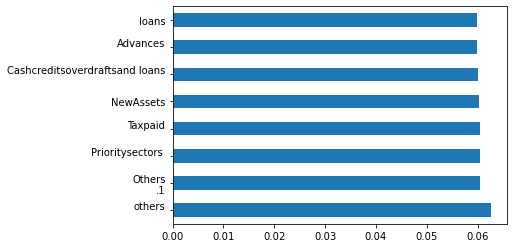

In [253]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

## model selction

In [297]:
# import seaborn as sns
# sns.pairplot(df13,hue='Investments\n')

## train test and split

In [260]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Feature scaling

In [261]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## knn

In [271]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.993914527250045

## k cross validation

In [272]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.98836935, 0.99027232, 0.99158286, 0.99373309, 0.99402494])

In [273]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1607723028.0952737, tolerance: 49414203.01643138
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1729310843.8526728, tolerance: 50424747.57074903
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1299303220.091238, tolerance: 44077169.74138799
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

,model,best_score,best_params
0,linear_regression,0.991597,{'normalize': True}
1,lasso,0.989659,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.943780,"{'criterion': 'mse', 'splitter': 'best'}"


## linear regression lassso and decision tree are most accurate models

## Random forest

In [282]:

from sklearn.ensemble import RandomForestRegressor
 

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 

regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [285]:
regressor.score(X_test, y_test)

0.9783935495707283

## hyperparameter tuning

In [294]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc.best_params_

In [ ]:
model3gs=RandomForestRegressor(criterion= 'entropy',max_depth= 5, max_features= 'auto', n_estimators= 500,random_state=42)